# Data Analysis for Hospitals

*(A part of Hyperskill "Introduction to Data Science" course, all datasets are provided by Hyperskill)*

*In this Notebook we will conduct a comprehensive data study using the pandas library: from uploading data and correcting errors in the CSV files to data visualization.*

Importing necessary libraries:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

Importing the datasets of 3 hospitals - **General**, **Prenatal** and **Sports**:

In [3]:
df_general = pd.read_csv('test/general.csv')
df_prenatal = pd.read_csv('test/prenatal.csv')
df_sports = pd.read_csv('test/sports.csv')

Let's have a look at the structure of said datasets:

**General Hospital:**

In [4]:
print(df_general.head(10))

   Unnamed: 0 hospital gender  age  height  weight   bmi    diagnosis  \
0           0  general    man   33    1.64      66  24.9         cold   
1           1  general    man   48    1.93     106  28.4      stomach   
2           2  general  woman   23    1.54      63  26.8         cold   
3           3  general    man   27    1.94     103  27.5      stomach   
4           4  general  woman   22    1.76      74  24.0  dislocation   
5           5  general    man   46    1.90      96  26.6        heart   
6           6  general  woman   68    1.80      85  26.4      stomach   
7           7  general    man   35    1.57      61  25.0         cold   
8           8  general  woman   50    1.86      86  25.0       sprain   
9           9  general    man   25    1.79      82  25.5        heart   

  blood_test  ecg ultrasound  mri xray  children  months  
0          t  NaN        NaN  NaN  NaN       NaN     NaN  
1          t  NaN          t  NaN  NaN       NaN     NaN  
2          t  NaN  

**Prenatal Hospital:**

In [5]:
print(df_prenatal.head(10))

   Unnamed: 0  HOSPITAL  Sex   age  height  weight   bmi  diagnosis  \
0           0  prenatal  NaN  27.0    1.63    74.0  28.0  pregnancy   
1           1  prenatal  NaN  18.0    1.70    89.0  31.3  pregnancy   
2           2  prenatal  NaN  34.0    1.65    67.0  24.9  pregnancy   
3           3  prenatal  NaN  29.0    1.58    71.0  28.7  pregnancy   
4           4  prenatal  NaN  33.0    1.51    57.0  25.3  pregnancy   
5           5  prenatal  NaN  31.0    1.96   101.0  26.3  pregnancy   
6           6  prenatal  NaN  30.0    1.78    75.0  23.7  pregnancy   
7           7  prenatal  NaN  19.0    1.70    83.0  28.6  pregnancy   
8           8  prenatal  NaN  44.0    1.66    68.0  25.0  pregnancy   
9           9  prenatal  NaN  35.0    1.57    54.0  22.3  pregnancy   

  blood_test ecg ultrasound  mri xray  children  months  
0          t   t          t  NaN    f       0.0     3.0  
1          t   t          t  NaN    f       1.0     5.0  
2          t   t          t  NaN    f       

**Sports Hospital:**

In [6]:
print(df_sports.head(10))

   Unnamed: 0 Hospital Male/female   age  height  weight   bmi    diagnosis  \
0           0   sports      female  20.0   5.871   150.0  21.3       sprain   
1           1   sports      female  20.0   6.665   248.0  27.3  dislocation   
2           2   sports        male  16.0   6.960   273.0  27.6  dislocation   
3           3   sports        male  17.0   7.128   269.0  25.9       sprain   
4           4   sports        male  19.0   5.993   209.0  28.4  dislocation   
5           5      NaN         NaN   NaN     NaN     NaN   NaN          NaN   
6           6   sports      female  14.0   5.793   176.0  25.7       sprain   
7           7   sports      female  22.0   7.351   265.0  24.0       sprain   
8           8   sports      female  21.0   6.059   189.0  25.2     fracture   
9           9   sports      female  18.0   5.338   151.0  26.0       sprain   

   blood_test  ecg  ultrasound  mri xray  children  months  
0         NaN    f         NaN    t    f       NaN     NaN  
1       

Renaming columns of **prenatal** and **sports** datasets to be in line with **general** dataset:

In [7]:
df_prenatal.rename(columns={'HOSPITAL':'hospital', 'Sex':'gender'}, inplace=True)
df_sports.rename(columns={'Hospital':'hospital', 'Male/female':'gender'}, inplace=True)

Merging the datasets and deleting 'Unnamed: 0' column:

In [8]:
hosp_data = pd.concat([df_general, df_prenatal, df_sports], ignore_index=True)
hosp_data.drop(columns='Unnamed: 0', inplace=True)

Let's have a look at the resulting table, taking random sample of 30 rows:

In [9]:
print(hosp_data.sample(n=20, random_state=30))

     hospital  gender   age  height  weight   bmi    diagnosis blood_test  \
928    sports    male  22.0   5.961   183.0  25.2       sprain        NaN   
926    sports    male  26.0   5.804   218.0  31.7       sprain        NaN   
901    sports  female  23.0   5.894   199.0  28.0       sprain        NaN   
87    general     man  54.0   1.720    78.0  26.4      stomach          f   
884    sports  female  20.0   6.771   244.0  26.0       sprain        NaN   
297   general     man  56.0   1.480    54.0  25.1         cold          f   
112   general     man  77.0   1.690    77.0  27.1        heart          t   
209   general     man  29.0   2.080   109.0  25.5      stomach          t   
419   general     man  53.0   1.700    78.0  27.2      stomach          t   
913    sports  female  22.0   6.435   250.0  29.5       sprain        NaN   
820    sports  female  17.0   5.722   172.0  25.7  dislocation        NaN   
861       NaN     NaN   NaN     NaN     NaN   NaN          NaN        NaN   

As our data is raw, we need to perform some cleaning, like deleting empty rows in our dataset and deal with missing values.

Deleting rows that entirely consist of missing data:

In [10]:
hosp_data.dropna(how='all', inplace=True)

Aligning gender column to have consistent records of F for Females and M for Males:

In [11]:
hosp_data.gender = hosp_data.gender.replace(['female', 'woman'], 'f')
hosp_data.gender = hosp_data.gender.replace(['male', 'man'], 'm')

Setting NaN gender records of prenatal hospitals to F:

In [12]:
hosp_data.loc[hosp_data['hospital'] == 'prenatal', 'gender'] = 'f'

Replacing NaN records of last 9 columns with 0:

In [13]:
values={'bmi':0, 'diagnosis':0, 'blood_test':0, 'ecg':0, 'ultrasound':0,
        'mri':0, 'xray':0, 'children':0, 'months':0}
hosp_data.fillna(value=values, inplace=True)

**So let's see what our cleaned dataset looks like:**

In [14]:
print(hosp_data.sample(n=20, random_state=30))

     hospital gender   age  height  weight   bmi  diagnosis blood_test ecg  \
929    sports      f  23.0   6.809   259.0  27.3     sprain          0   f   
927    sports      m  21.0   6.052   172.0  22.9     sprain          0   f   
516  prenatal      f  20.0   1.650    66.0  24.3  pregnancy          t   t   
87    general      m  54.0   1.720    78.0  26.4    stomach          f   0   
885    sports      f  16.0   5.915   188.0  26.3     sprain          0   f   
463  prenatal      f  34.0   1.650    67.0  24.9  pregnancy          t   t   
112   general      m  77.0   1.690    77.0  27.1      heart          t   t   
297   general      m  56.0   1.480    54.0  25.1       cold          f   0   
417   general      f  26.0   1.650    69.0  25.3       cold          t   0   
660  prenatal      f  38.0   1.590    70.0  27.6  pregnancy          t   t   
344   general      f  60.0   1.410    56.0  28.3    stomach          t   0   
834    sports      f  21.0   5.585   184.0  29.0   fracture     

## Answering Questions

After cleaning and merging our datasets we are ready to perform an analysis and answer questions:

**1. Which hospital has the highest number of patients?**

In [15]:
amount_of_patients = hosp_data.hospital.value_counts()
print(amount_of_patients)

hospital
general     461
prenatal    325
sports      214
Name: count, dtype: int64


**From the above table we see that the General hospital has the biggest number of patients, thus the reply is:**

In [16]:
max_amount_of_patients = hosp_data.hospital.value_counts().idxmax()
print(f'Biggest number of patients is served by {max_amount_of_patients} hospital')

Biggest number of patients is served by general hospital


**2. What share of the patients in the general hospital suffers from stomach-related issues?**

In [17]:
total_gen_patients = len(hosp_data.loc[hosp_data['hospital']=='general'])
stomach_issue = len(hosp_data.loc[(hosp_data['hospital']=='general') & (hosp_data['diagnosis']=='stomach')])
stomach_share = round(stomach_issue/total_gen_patients, 3)
print(f'The answer to the 2nd question is {stomach_share}')

The answer to the 2nd question is 0.325


**As we see in the outcome of our code above, the share of patients suffering from stomach issues in General hospital is 0.325**

**3. What share of the patients in the sports hospital suffers from dislocation-related issues?**

In [18]:
total_sport_patients = len(hosp_data.loc[hosp_data['hospital']=='sports'])
disloc_issue = len(hosp_data.loc[(hosp_data['hospital']=='sports') & (hosp_data['diagnosis']=='dislocation')])
disloc_share = round(disloc_issue/total_sport_patients, 3)
print(f'The answer to the 3rd question is {disloc_share}')

The answer to the 3rd question is 0.285


**The result above shows, the share of patients suffering from dislocation issues in Sport hospital is 0.285**

**4. What is the difference in the median of ages of the patients in the general and sports hospitals?**

In [19]:
median_age_gen = hosp_data.loc[hosp_data['hospital']=='general', 'age'].median()
median_age_sports = hosp_data.loc[hosp_data['hospital']=='sports', 'age'].median()
print(f'The answer to the 4th question is {median_age_gen-median_age_sports}')

The answer to the 4th question is 19.0


**The difference in the median of ages of the patients in the general and sports hospitals is 19.0**

**5. In which hospital the blood test has been taken the most often?**

Here we should note that the *blood_test* column contains 3 possible values: 
t = a blood test has been taken, 
f = a blood test hasn't been taken, 
0 = there is no information.
So we need to filter our dataset first, to take only the values where the blood test has been taken.

In [20]:
blood_table = hosp_data[['hospital','blood_test']].loc[hosp_data['blood_test']=='t']
aggr_blood_table = blood_table.value_counts()
max_blood_test_qtty = aggr_blood_table.max()
max_blood_tests_hosp = aggr_blood_table.idxmax()[0]
print(f'The answer to the 5th question is {max_blood_tests_hosp} hospital, {max_blood_test_qtty} blood tests')

The answer to the 5th question is prenatal hospital, 325 blood tests


**Thus Prenatal hospital has taken the biggest amount of blood tests - 325**

## Visualizing Data

Let's visualize data to answer further questions.

**6. What is the most common age of patients among all hospitals?**

To answer this question, first we will divide all patients among all hospitals into following age groups: 0-15 years old, 15-35, 35-55, 55-70 and 70-80.

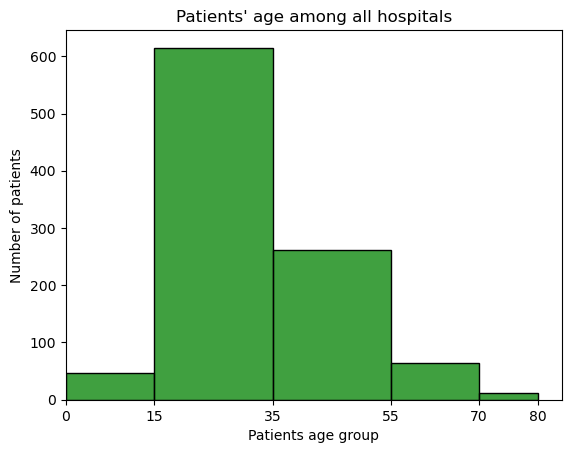

In [21]:
plt.figure()
bins = [0,15,35,55,70,80]
age_hist = sns.histplot(data=hosp_data, x='age', bins=bins, color='green')
age_hist.set(xlabel='Patients age group', ylabel='Number of patients', title="Patients' age among all hospitals")
age_hist.set_xticks(bins)
plt.xlim(0)
plt.show()

**Here we see that 15-35 age group is the most common among all hospitals**

**7. What is the most common diagnosis among patients in all hospitals?**

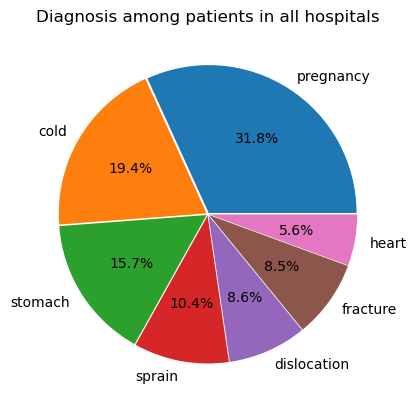

In [22]:
plt.figure()
diag_df = hosp_data['diagnosis'].value_counts()
explode = (0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01)
pie_diag = plt.pie(diag_df, labels=diag_df.index, autopct='%1.1f%%', explode=explode)
plt.title("Diagnosis among patients in all hospitals")
plt.show()

**Well, now we see that the biggest amount of patients is diagnosed with pregnancy. A great diagnosis, isn't it?**

**8. Build a violin plot of height distribution by hospitals.**

Here we need to pay attention that the **sports hospital** is using different measurement system, keeping patients' records in feet, not in meters, thus in order to be able to compare data with other hospitals, we have to convert height from the sports hospital data.

In [23]:
height_sport = hosp_data['height'].loc[hosp_data.hospital == 'sports'].apply(lambda x: round((x/3.218), 2))
print(height_sport.head(20))

789    1.82
790    2.07
791    2.16
792    2.22
793    1.86
795    1.80
796    2.28
797    1.88
798    1.66
799    1.92
800    1.92
801    1.91
802    1.84
803    2.00
804    2.05
805    2.10
806    1.89
807    2.17
808    1.92
809    2.02
Name: height, dtype: float64


Let's take heights of patients of other hospitals separately and build a **violin plot**, showing **distribution** of patients' heights for different hospitals:

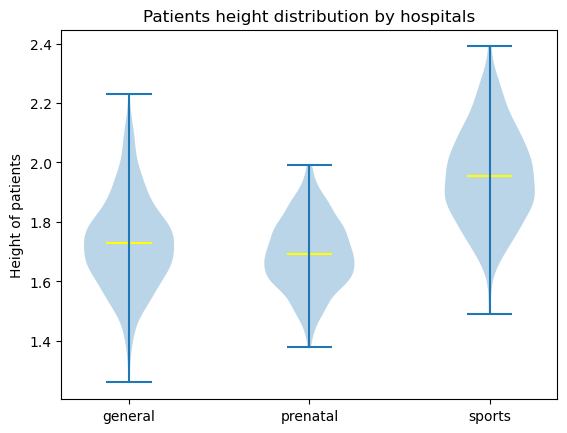

In [24]:
height_general = hosp_data['height'].loc[hosp_data.hospital == 'general']
height_prenatal = hosp_data['height'].loc[hosp_data.hospital == 'prenatal']
height_data = [height_general, height_prenatal, height_sport]
fig, axes = plt.subplots()
height_plot = plt.violinplot(height_data, showmeans=True)
axes.set_xticks((1, 2, 3))
axes.set_xticklabels(('general','prenatal','sports'))
axes.set_ylabel("Height of patients")
axes.set_title('Patients height distribution by hospitals')
height_plot['cmeans'].set_color('Yellow')
plt.show()

On the above plot we can see the height distribution for 3 different hospitals. In the middle of each violin plot we have mean marked in yellow. Well, here we can clearly see that the average height of patients served by sports hospital is bigger than those ones served by general and prenatal hospitals. Patients of the latter one have the lowest average height, which makes sense, knowing that the prenatal hospitals treat females (who generally tend to have smaller height).

**As we see, data is powerful. With just 3 source tables and few lines of code it's possible to clean, combine and analyze data, visualize our results and get useful insights from it.**

*Made by __Artur Azimov__*

*(The project is a part of Hyperskill(Jetbrains) "Introduction to Data Science" course)*